In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas
import random
import seaborn as sns
sns.set_theme()

from matplotlib import pyplot as plt

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/fake-reviews-detection/source/common/')

In [5]:
import data_preprocessing
import ngram
import linguistic_feature

In [6]:
root_dir = "/content/drive/My Drive/Colab Notebooks/fake-reviews-detection"
df = data_preprocessing.import_raw_data(root_dir)
display(df[:5])

,Label,Rating,Ori_Review
0,1,1,"For 250 dollars, cheapest room available at th..."
1,1,1,Me and my business associate had a job in Chic...
2,1,1,My stay at the Hyatt Regency was an experience...
3,1,1,"Upon first inspection, Sofitel Chicago Water T..."
4,1,1,I wish to express my dissatisfaction with my s...


In [7]:
df = data_preprocessing.preprocess_ngram(df)
df = data_preprocessing.preprocess_linguistic_features(df)
df = linguistic_feature.linguistic_features(df)
df.head()

,Label,Rating,Ori_Review,Clean_Review,PP_Review,Word_List,Word_List_all,num_word,num_coreword,num_stopword,num_char,char_per_word,num_first_sing,num_first_pru,num_third
0,1,1,"For 250 dollars, cheapest room available at th...",for dollar cheap room available at the hard ro...,dollar cheap available hard rock assume access...,"[dollar, cheap, available, hard, rock, assume,...","[for, 250, dollar, cheap, room, available, at,...",68,24,44,357,5.250000,4,0,1
1,1,1,Me and my business associate had a job in Chic...,me and my business associate have a job in chi...,business associate job want somewhere feature ...,"[business, associate, job, want, somewhere, fe...","[me, and, my, business, associate, have, a, jo...",104,41,63,544,5.230769,2,8,0
2,1,1,My stay at the Hyatt Regency was an experience...,my stay at the hyatt regency be an experience ...,hyatt regency experience never ever forget goo...,"[hyatt, regency, experience, never, ever, forg...","[my, stay, at, the, hyatt, regency, be, an, ex...",264,116,148,1265,4.791667,22,0,5
3,1,1,"Upon first inspection, Sofitel Chicago Water T...",upon first inspection sofitel chicago water to...,upon first inspection sofitel water tower look...,"[upon, first, inspection, sofitel, water, towe...","[upon, first, inspection, sofitel, chicago, wa...",135,65,70,738,5.466667,1,0,1
4,1,1,I wish to express my dissatisfaction with my s...,i wish to express my dissatisfaction with my s...,wish express dissatisfaction sofitel water tow...,"[wish, express, dissatisfaction, sofitel, wate...","[i, wish, to, express, my, dissatisfaction, wi...",227,87,140,1222,5.383260,16,10,4


## Sample Reviews

#### Deceptive

In [8]:
for txt in df[df['Label'] == 1]['Ori_Review'].sample(3):
    print(txt)
    print()

If you have the money, Amalfi Hotel is the place for you. All the way from it's 316 thread count, Egyptian linens to the 24 hour fitness center. This hotel has anything you would need or want. The rooms are equipped with free wi-fi, 32in plasma televisions, multi-head showers and much, much more. You can do anything from fine dining and wine to working on the computers in the business center, which is equipped with computers free to your use. After a long night at the bar, you can get a complimentary breakfast at each floor. Over all the service is great as well. I recommend this hotel to any one from business professionals to young singles looking for a good time. I plan on coming back very soon.

I was unimpressed by the quality of this hotel. The overall look of the place was marred by what felt like poor maintenance. Given that this is supposed to be a luxury hotel and charges rates at that level, this was most disappointing. Nor was I impressed with the snooty attitude taken by th

#### Truthful

In [9]:
for txt in df[df['Label'] == -1]['Ori_Review'].sample(3):
    print(txt)
    print()

Stayed here for 4 nights in Apri. From check in the stay was perfect all round, staff were so helpfuly and friendly especially Chris and Scott. The location couldn't be better right on Michigan Avenue so easy access to everything. Room was lovely and spacious and always clean and tidy at the end of the day. Will definately recommend it to friends and family.

This lovely hotel has only six floors, making it easy to get to elevators and down to reception. The building is dwarfed amongst all the skyscrapers around it. Trump's huge new tower is just down the street. The Amalfi looks recently refurbished, very modern, but warm and inviting. Bedrooms quite spacious with lovely linens and very, very comfortable beds. Bathroom quite small but roomy enough, with Aveda tolietries and constant hot water in the showers. Continental style breakfast is set out fresh every morning in front of the elevator of every floor. Great to stumble out of bed and grab a coffee etc (robes & slippers provided) w

## Explore Data Distribution

#### Review length distribution (by charactors and words)

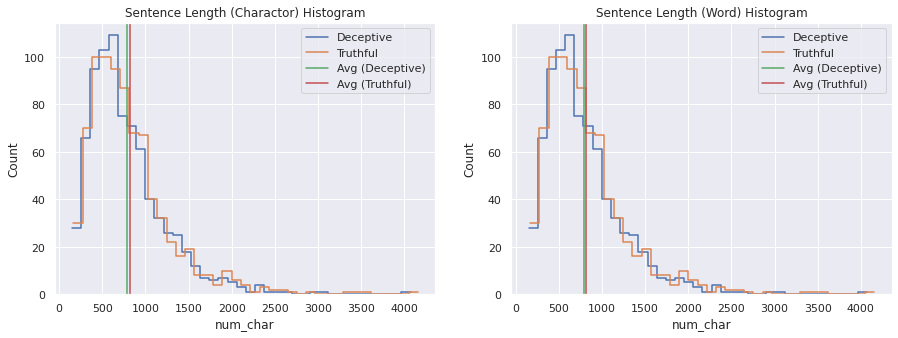

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_char_dec = df[df['Label'] == 1]['num_char']
num_char_tru = df[df['Label'] == -1]['num_char']
num_word_dec = df[df['Label'] == 1]['num_char']
num_word_tru = df[df['Label'] == -1]['num_char']

sns.histplot(num_char_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_char_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_char_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_char_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('Sentence Length (Charactor) Histogram')
ax1.legend()

sns.histplot(num_word_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_word_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_word_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_word_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('Sentence Length (Word) Histogram')
ax2.legend()

plt.show()

#### Core word and stop word distribution

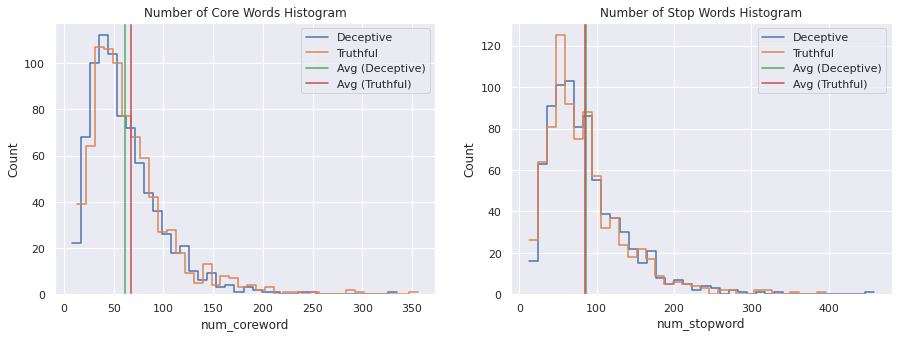

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_core_dec = df[df['Label'] == 1]['num_coreword']
num_core_tru = df[df['Label'] == -1]['num_coreword']
num_stop_dec = df[df['Label'] == 1]['num_stopword']
num_stop_tru = df[df['Label'] == -1]['num_stopword']

sns.histplot(num_core_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_core_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_core_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_core_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('Number of Core Words Histogram')
ax1.legend()

sns.histplot(num_stop_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_stop_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_stop_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_stop_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('Number of Stop Words Histogram')
ax2.legend()

plt.show()

#### Pronoun Distribution

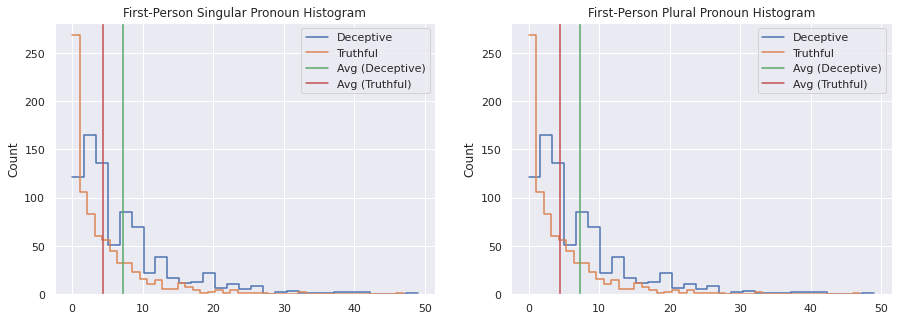

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_fs_dec = df[df['Label'] == 1]['num_first_sing']
num_fs_tru = df[df['Label'] == -1]['num_first_sing']
num_fp_dec = df[df['Label'] == 1]['num_first_pru']
num_fp_tru = df[df['Label'] == -1]['num_first_pru']
num_third_dec = df[df['Label'] == 1]['num_third']
num_third_tru = df[df['Label'] == -1]['num_third']

sns.histplot(num_fs_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_fs_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_fs_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_fs_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('First-Person Singular Pronoun Histogram')
ax1.set(xlabel='')
ax1.legend()

sns.histplot(num_fs_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_fs_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_fs_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_fs_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('First-Person Plural Pronoun Histogram')
ax2.set(xlabel='')
ax2.legend()

plt.savefig('first_person_pronoun.png')
plt.show()